# **THE PROMOTION PARADOX:**
### *Fixing Biased Talent Promotion Decisions Through Data-Driven HR Analytics*

**Final project by Syntax Society**
- Bayu Maitra
- Dian Ulhaq
- Febiansyah Ahnaf
- Keisya Nisrina Aulia
- Maslahatul Husna

# **IMPORT TOOLS & LOAD DATASET**

In [ ]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Library Modeling
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from imblearn.pipeline import Pipeline

# Library Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# load data
df = pd.read_csv("dataset_clean_unscaled.csv")
df.head()

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,2.0,44.0,42.0,19.0,61.0,0.0,54.2,23.1,50.0,0.441860,1.355556,38.0
1,5.0,45.0,66.0,11.0,6.0,0.0,21.6,6.5,37.8,0.164179,0.130435,55.0
2,5.0,19.0,96.0,6.0,86.0,0.0,59.2,29.5,76.6,0.061856,4.300000,30.0
3,4.0,51.0,16.0,6.0,52.0,0.0,51.6,18.8,37.4,0.352941,1.000000,24.0
4,4.0,64.0,57.0,16.0,59.0,0.0,61.0,22.9,59.2,0.275862,0.907692,64.0


# **Feature Engineering**

## **Drop Bias Label**

In [ ]:
fixed_df = df.drop(columns=[
    'Promotion_Eligible',
])

In [ ]:
fixed_df.head(10)

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,2.0,44.0,42.0,19.0,61.0,54.2,23.1,50.0,0.441860,1.355556,38.0
1,5.0,45.0,66.0,11.0,6.0,21.6,6.5,37.8,0.164179,0.130435,55.0
2,5.0,19.0,96.0,6.0,86.0,59.2,29.5,76.6,0.061856,4.300000,30.0
3,4.0,51.0,16.0,6.0,52.0,51.6,18.8,37.4,0.352941,1.000000,24.0
4,4.0,64.0,57.0,16.0,59.0,61.0,22.9,59.2,0.275862,0.907692,64.0
5,1.0,76.0,143.0,19.0,32.0,49.6,13.9,85.2,0.131944,0.415584,19.0
6,4.0,75.0,98.0,5.0,91.0,84.6,30.3,90.6,0.050505,1.197368,20.0
7,3.0,67.0,145.0,8.0,19.0,38.2,8.8,79.0,0.054795,0.279412,24.0
8,2.0,75.0,184.0,19.0,36.0,51.6,15.6,103.0,0.102703,0.473684,38.0
9,1.0,92.0,71.0,1.0,1.0,37.4,1.0,47.2,0.013889,0.010753,1.0


## **New Label**

In [ ]:
# Save new target variable based on weighted scoring to df
df['Promotion_Score'] = (
    df['Leadership_Influence'] * 0.425 +
    df['Performance_Index'] * 0.221 +
    df['Performance_Consistency'] * 0.137 +
    df['Growth_Momentum'] * 0.130 +
    df['Leadership_Index'] * 0.074 +
    df['Potential_Index'] * 0.013
)
df.head(10)

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency,Promotion_Score
0,2.0,44.0,42.0,19.0,61.0,0.0,54.2,23.1,50.0,0.441860,1.355556,38.0,15.605453
1,5.0,45.0,66.0,11.0,6.0,0.0,21.6,6.5,37.8,0.164179,0.130435,55.0,11.138078
2,5.0,19.0,96.0,6.0,86.0,0.0,59.2,29.5,76.6,0.061856,4.300000,30.0,17.841641
3,4.0,51.0,16.0,6.0,52.0,0.0,51.6,18.8,37.4,0.352941,1.000000,24.0,12.218282
4,4.0,64.0,57.0,16.0,59.0,0.0,61.0,22.9,59.2,0.275862,0.907692,64.0,19.534131
5,1.0,76.0,143.0,19.0,32.0,1.0,49.6,13.9,85.2,0.131944,0.415584,19.0,10.646676
6,4.0,75.0,98.0,5.0,91.0,0.0,84.6,30.3,90.6,0.050505,1.197368,20.0,17.389947
7,3.0,67.0,145.0,8.0,19.0,0.0,38.2,8.8,79.0,0.054795,0.279412,24.0,9.212473
8,2.0,75.0,184.0,19.0,36.0,0.0,51.6,15.6,103.0,0.102703,0.473684,38.0,14.025667
9,1.0,92.0,71.0,1.0,1.0,0.0,37.4,1.0,47.2,0.013889,0.010753,1.0,3.745575


In [ ]:
# Binary Eligible_New based on 85th percentile of Promotion_Score
threshold = df['Promotion_Score'].quantile(0.85)
fixed_df['Eligible_New'] = (df['Promotion_Score'] >= threshold).astype(int)
fixed_df.head(10)

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency,Eligible_New
0,2.0,44.0,42.0,19.0,61.0,54.2,23.1,50.0,0.441860,1.355556,38.0,0
1,5.0,45.0,66.0,11.0,6.0,21.6,6.5,37.8,0.164179,0.130435,55.0,0
2,5.0,19.0,96.0,6.0,86.0,59.2,29.5,76.6,0.061856,4.300000,30.0,0
3,4.0,51.0,16.0,6.0,52.0,51.6,18.8,37.4,0.352941,1.000000,24.0,0
4,4.0,64.0,57.0,16.0,59.0,61.0,22.9,59.2,0.275862,0.907692,64.0,1
5,1.0,76.0,143.0,19.0,32.0,49.6,13.9,85.2,0.131944,0.415584,19.0,0
6,4.0,75.0,98.0,5.0,91.0,84.6,30.3,90.6,0.050505,1.197368,20.0,0
7,3.0,67.0,145.0,8.0,19.0,38.2,8.8,79.0,0.054795,0.279412,24.0,0
8,2.0,75.0,184.0,19.0,36.0,51.6,15.6,103.0,0.102703,0.473684,38.0,0
9,1.0,92.0,71.0,1.0,1.0,37.4,1.0,47.2,0.013889,0.010753,1.0,0


In [ ]:
fixed_df[fixed_df["Eligible_New"] > 0]

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency,Eligible_New
4,4.0,64.0,57.0,16.0,59.0,61.0,22.9,59.2,0.275862,0.907692,64.0,1
22,2.0,1.0,197.0,10.0,80.0,48.4,27.0,111.0,0.050505,40.000000,20.0,1
23,5.0,33.0,102.0,18.0,51.0,43.8,21.4,67.8,0.174757,1.500000,90.0,1
33,1.0,1.0,56.0,18.0,75.0,45.4,26.6,52.6,0.315789,37.500000,18.0,1
48,4.0,29.0,102.0,19.0,98.0,70.4,35.2,85.8,0.184466,3.266667,76.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
948,3.0,13.0,64.0,13.0,99.0,64.6,33.8,67.8,0.200000,7.071429,39.0,1
950,5.0,78.0,117.0,15.0,50.0,61.2,20.5,82.4,0.127119,0.632911,75.0,1
959,4.0,84.0,71.0,19.0,37.0,55.8,16.9,60.0,0.263889,0.435294,76.0,1
972,4.0,48.0,19.0,11.0,86.0,70.8,30.0,51.6,0.550000,1.755102,44.0,1


In [ ]:
(fixed_df["Eligible_New"] > 0).sum()

np.int64(148)

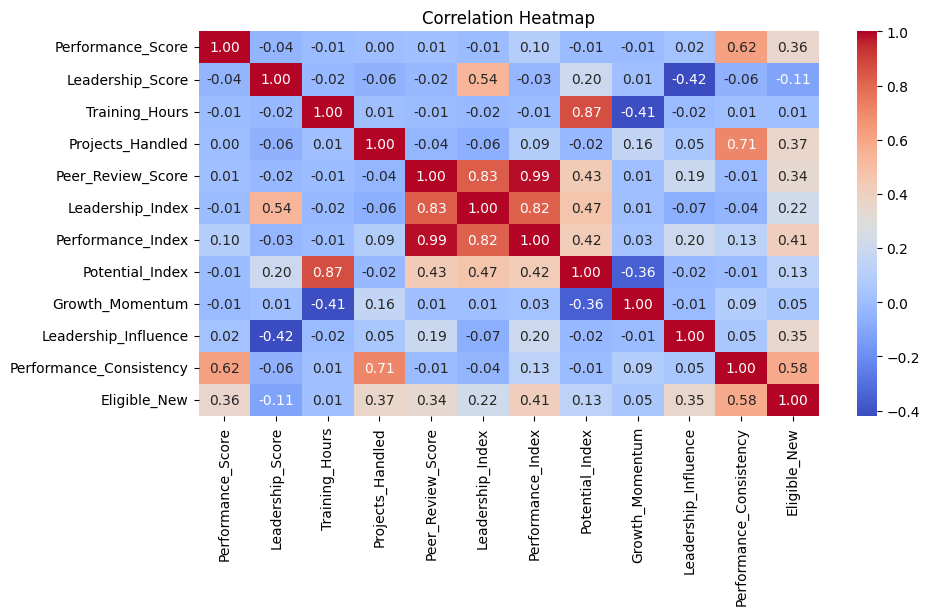

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(fixed_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Modeling**

## **Split Data**

In [ ]:
# split
X = fixed_df.drop(columns=['Eligible_New'])
y = fixed_df['Eligible_New']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

total_data = X_train.shape[0] + X_test.shape[0]
percent_train = (X_train.shape[0] / total_data) * 100
percent_test = (X_test.shape[0] / total_data) * 100

print(f"Total training data(X_train): {X_train.shape[0]} row ({percent_train:.2f}%)")
print(f"Total testing data (X_test): {X_test.shape[0]} row ({percent_test:.2f}%)")

Total training data(X_train): 690 row (69.91%)
Total testing data (X_test): 297 row (30.09%)


## **Decision Tree**

In [ ]:
# Model
baseline_dt = DecisionTreeClassifier(random_state=42)

# Training model
baseline_dt.fit(X_train, y_train)

# Save model
baseline_results = {}

## **Tuned Decision Tree**

In [ ]:
# Model
pipe_dt = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTETomek(random_state=42)),
    ("model", DecisionTreeClassifier(random_state=42)),
])

# Hyperparameter Grid
dt_params = {
    "model__max_depth": [3, 4, 5, 6, 10, None],
    "model__min_samples_split": [2, 10, 20],
    "model__min_samples_leaf": [1, 3, 5],
    "model__criterion": ["gini", "entropy"],
}

# Grid Search
grid_dt = GridSearchCV(pipe_dt, param_grid=dt_params, cv=10, scoring="recall", n_jobs=-1, verbose=1)

# Training model
grid_dt.fit(X_train, y_train)

# Best Model
best_dt = grid_dt.best_estimator_
print("Best Parameters:", grid_dt.best_params_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


## **Random Forest**

In [ ]:
# Model
random_forest = RandomForestClassifier(random_state=42)

# Training Model
random_forest.fit(X_train, y_train)

# Save model
rf_results = {}

## **Tuned Random Forest**

In [ ]:
# Model
pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTETomek(random_state=42)),
    ("model", RandomForestClassifier(random_state=42)),
])

# Hyperparameter Grid
param_rf = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [5, 10, 15, None],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 3],
    "model__max_features": ["sqrt", "log2"],
    "model__bootstrap": [True, False],
}

# Grid Search
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=10, scoring="recall", n_jobs=-1)

# Training model
grid_rf.fit(X_train, y_train)

# Save model
rf_tuned_results = {}

# Best model
rf_best = grid_rf.best_estimator_
print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'model__bootstrap': True, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


## **XGBoost**

In [ ]:
# Model
xgboost = XGBClassifier(random_state=42)

# Training model
xgboost.fit(X_train, y_train)

# Save model
xgboost_results = {}

## **Tuned XGBoost**

In [ ]:
# Model
pipe_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTETomek(random_state=42)),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ))
])

# Hyperparameter Grid
param_xgb = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.1],
    "model__subsample": [0.7, 1.0],
    "model__colsample_bytree": [0.7, 1.0],
    "model__min_child_weight": [1, 3, 5],
    "model__gamma": [0, 0.1, 0.2],
    "model__scale_pos_weight": [1, 3, 5, 10]
}

# Grid search
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=10, scoring="recall", n_jobs=-1)

# Training model
grid_xgb.fit(X_train, y_train)

# Save model
xgb_tuned_results = {}

# Best model
xgboost_best = grid_xgb.best_estimator_
print("Best Parameters:", grid_xgb.best_params_)

# **Evaluation**

In [ ]:
from sklearn.metrics import *
from sklearn.base import clone

models = {
    "Decision Tree": baseline_dt,
    "Tuned Decision Tree": grid_dt,
    "Random Forest": random_forest,
    "Tuned Random Forest": grid_rf,
    "XGBoost": xgboost,
    "Tuned XGBoost": grid_xgb,
}

compare = []

for name, model in models.items():

    # check model have best_estimator_ or not
    if hasattr(model, "best_estimator_"):
        best_model = clone(model.best_estimator_)
    else:
        best_model = clone(model)

    # Train model
    best_model.fit(X_train, y_train)

    # Predict
    y_train_pred = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)

    # Proba (check model support predict_proba)
    if hasattr(best_model, "predict_proba"):
        train_proba = best_model.predict_proba(X_train)[:, 1]
        test_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc_train_score = roc_auc_score(y_train, train_proba)
        roc_auc_test_score = roc_auc_score(y_test, test_proba)
    else:
        # if support predict_proba
        if hasattr(best_model, "decision_function"):
            train_proba = best_model.decision_function(X_train)
            test_proba = best_model.decision_function(X_test)
            roc_auc_train_score = roc_auc_score(y_train, train_proba)
            roc_auc_test_score = roc_auc_score(y_test, test_proba)
        else:
            # if not supported
            roc_auc_train_score = np.nan
            roc_auc_test_score = np.nan

    compare.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Train Precision (macro)": precision_score(y_train, y_train_pred, average='macro'),
        "Test Precision (macro)": precision_score(y_test, y_pred, average='macro'),
        "Train Recall (macro)": recall_score(y_train, y_train_pred, average='macro'),
        "Test Recall (macro)": recall_score(y_test, y_pred, average='macro'),
        "Train F1 Score (macro)": f1_score(y_train, y_train_pred, average='macro'),
        "Test F1 Score (macro)": f1_score(y_test, y_pred, average='macro'),
        "ROC-AUC Train (ovr)": roc_auc_train_score,
        "ROC-AUC Test (ovr)": roc_auc_test_score,
    })

df_compare = pd.DataFrame(compare)
display(df_compare)

In [ ]:
# Confusion Matrix per Model
for idx, row in df_compare.iterrows():
    model_name = row["Model"]

    # ambil kembali modelnya
    model = models[model_name]
    if hasattr(model, "best_estimator_"):
        best_model = clone(model.best_estimator_)
    else:
        best_model = clone(model)

    best_model.fit(X_train, y_train)

    # prediksi
    y_train_pred = best_model.predict(X_train)
    y_test_pred  = best_model.predict(X_test)

    # confusion matrix
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test  = confusion_matrix(y_test, y_test_pred)

    # ubah ke dataframe agar rapi
    cm_train_df = pd.DataFrame(
        cm_train,
        index=["Actual 0", "Actual 1"],
        columns=["Pred 0", "Pred 1"]
    )
    cm_test_df = pd.DataFrame(
        cm_test,
        index=["Actual 0", "Actual 1"],
        columns=["Pred 0", "Pred 1"]
    )

    print(f"\n============================")
    print(f"Confusion Matrix - {model_name}")
    print(f"============================\n")

    print("Train:")
    display(cm_train_df)

    print("\Test:")
    display(cm_test_df)


# ✨ **Model Evaluation Summary**
## 🎯 *Classification Results Using Rule-Based Target Labels*

---

## 📊 **Overall Performance**

All classification models — **Decision Tree**, **Random Forest**, **XGBoost**, and their tuned versions — show **very high performance** across all evaluation metrics:

- ✅ **Accuracy**
- 🎯 **Precision (macro)**
- 📈 **Recall (macro)**
- 🧩 **F1-Score (macro)**
- 🔵 **ROC-AUC (ovr)**

Because the target labels were generated using a **deterministic rule-based system**, tree-based models can easily replicate the pattern with almost perfect predictions.  
As a result, both training and testing scores appear extremely high.

---

## ⚠️ **Why These Models Are Not Used**

Even though the models achieve excellent scores, **they are not used in the final system** because:

> ### 🔍 **1. The target labels come entirely from rule-based logic**  
The models are simply *memorizing the rules*, not learning new patterns.

> ### ⚙️ **2. Machine learning becomes unnecessary**  
If the rules are already explicit, deterministic, and valid, ML adds no value.

> ### 🧠 **3. No additional generalization or insight**  
The models cannot provide knowledge beyond what the rules already define.

> ### 📘 **4. Rule-based is more explainable**  
It is easier to audit, interpret, maintain, and justify.

---

## 📝 **Conclusion**

This evaluation confirms that the rule-based target labels are consistent and easy for tree-based models to replicate.  
However, for the final implementation, **the system relies exclusively on rule-based logic**, because it:

- is simpler,  
- is more stable,  
- is more transparent,  
- and does not require any model training.

➡️ **Machine learning models are not used because they do not provide additional value beyond the existing rule-based approach.**